## Sim Demo

### Imports

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from env.imports import *

In [13]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

#### Check job specs

In [14]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 10.5%
RAM Usage: 3.4%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


In [15]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


None
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.06 GB


In [16]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |


In [17]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

#### Simulation tests <a id="sims"></a>

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome_PCA
processing_type:  None
features ['transcriptome_PCA']
X generated... expanding to pairwise dataset


  warnings.warn(



1
2
3
BEST CONFIG {'input_dim': 54, 'binarize': False, 'hidden_dims': [256, 128], 'learning_rate': 9e-05, 'batch_size': 512, 'dropout_rate': 0.2, 'weight_decay': 0.0001, 'epochs': 5}
Number of learnable parameters in MLP: 47873
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.06 GB
Best val loss so far at epoch 1: 0.0336
Best val loss so far at epoch 2: 0.0284
Best val loss so far at epoch 3: 0.0266
Best val loss so far at epoch 4: 0.0254
Epoch 5/5, Train Loss: 0.0425, Val Loss: 0.0244
Best val loss so far at epoch 5: 0.0244
Model state dict loaded from best model


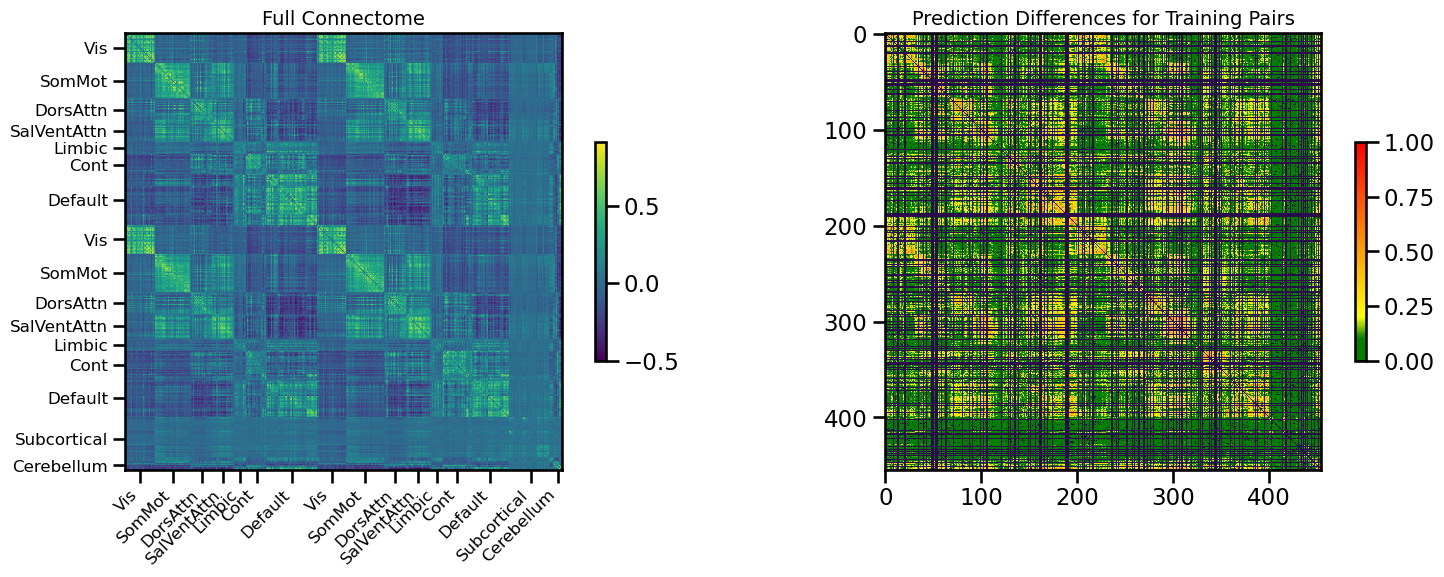

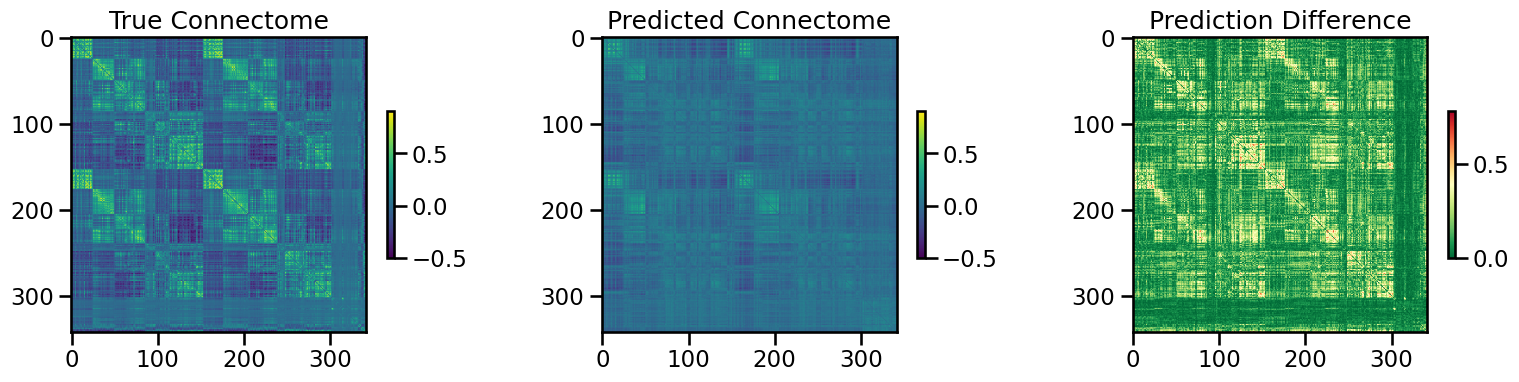

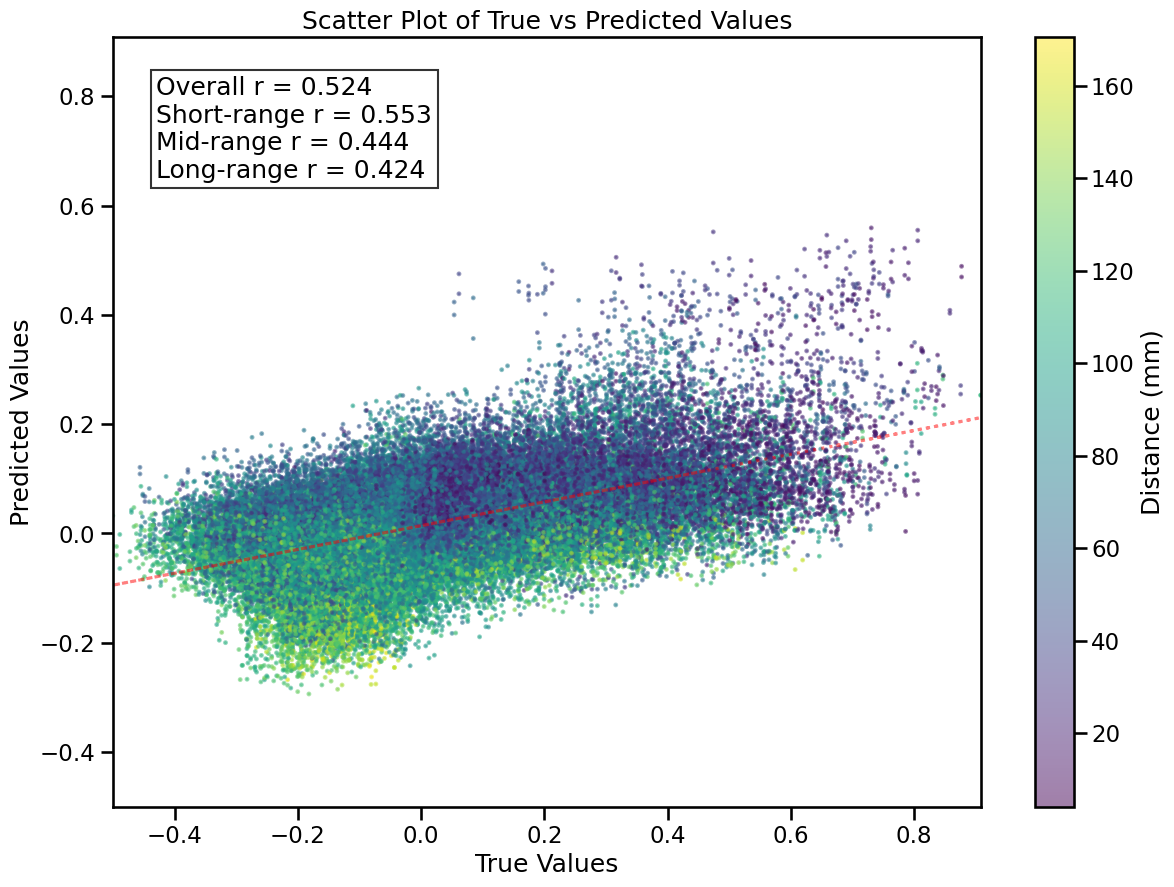

# of NaNs in bin_means_true: 0
bin_means_true: [ 0.35599112  0.34494061  0.17659261  0.09025148  0.04503496  0.0298311
  0.0154561   0.00371128 -0.00239748 -0.00801794 -0.01829182 -0.027474
 -0.05601712 -0.08110101 -0.07520845 -0.0748547  -0.09600545 -0.07609601]
bin_centers: [  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
 145. 155. 165. 175.]

Distance-based prediction metrics:
MSE: 0.0314
MAE: 0.1288
R2: 0.0730
Pearson r: 0.3190


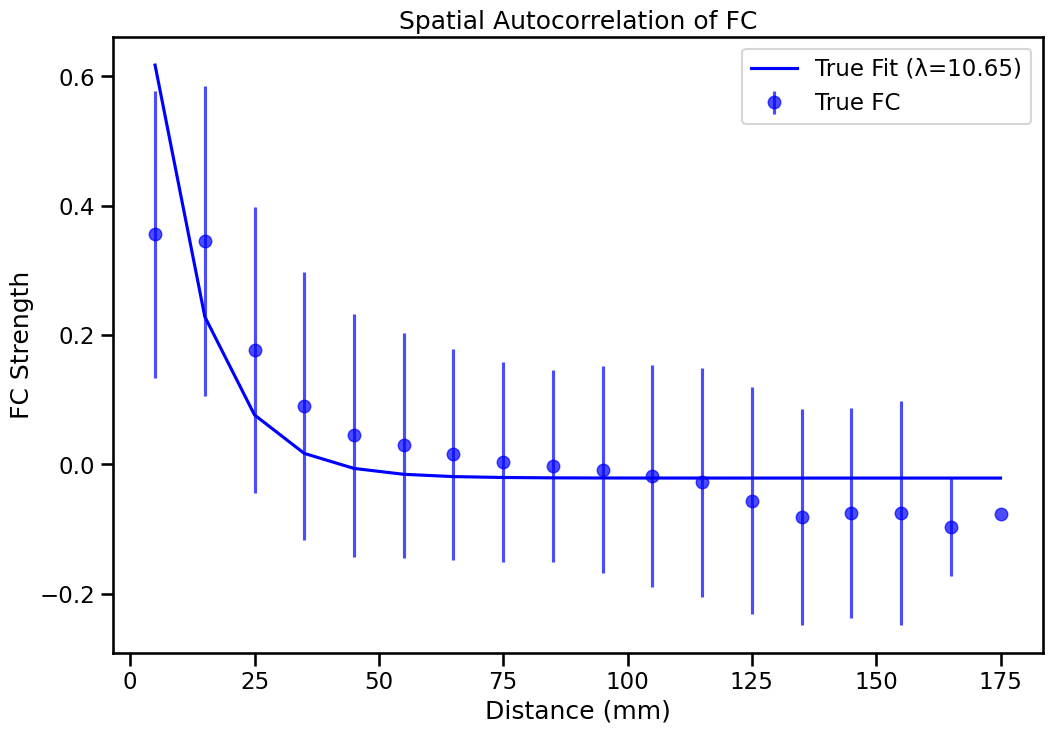

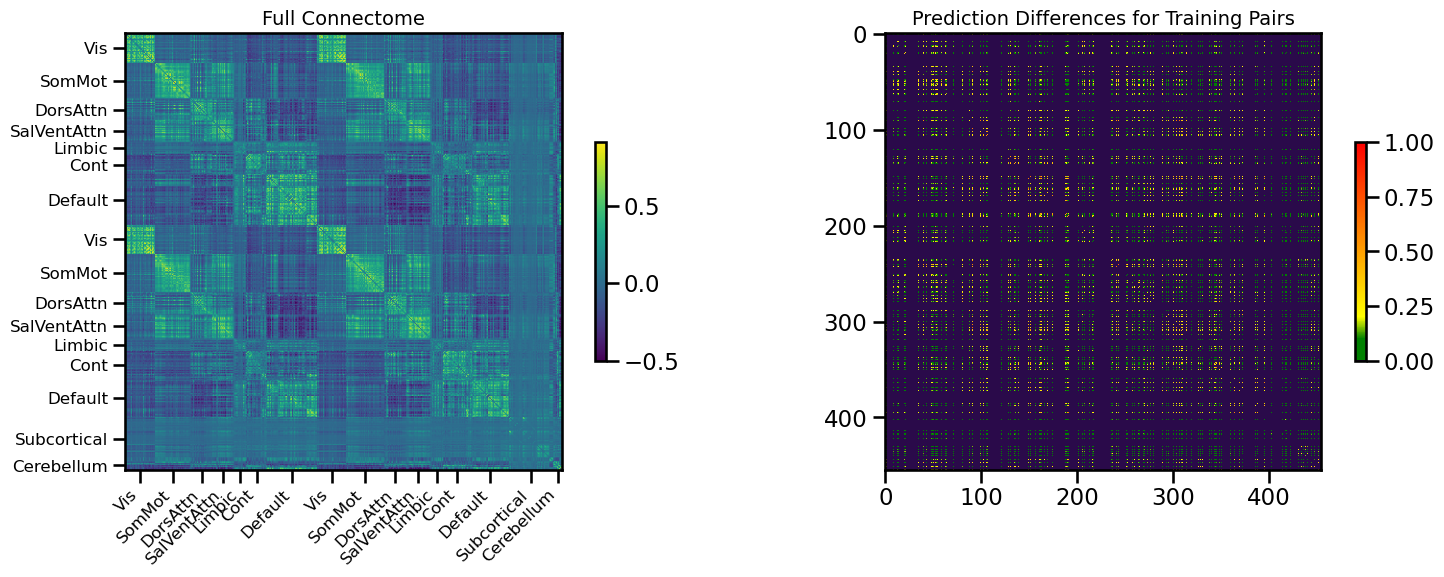

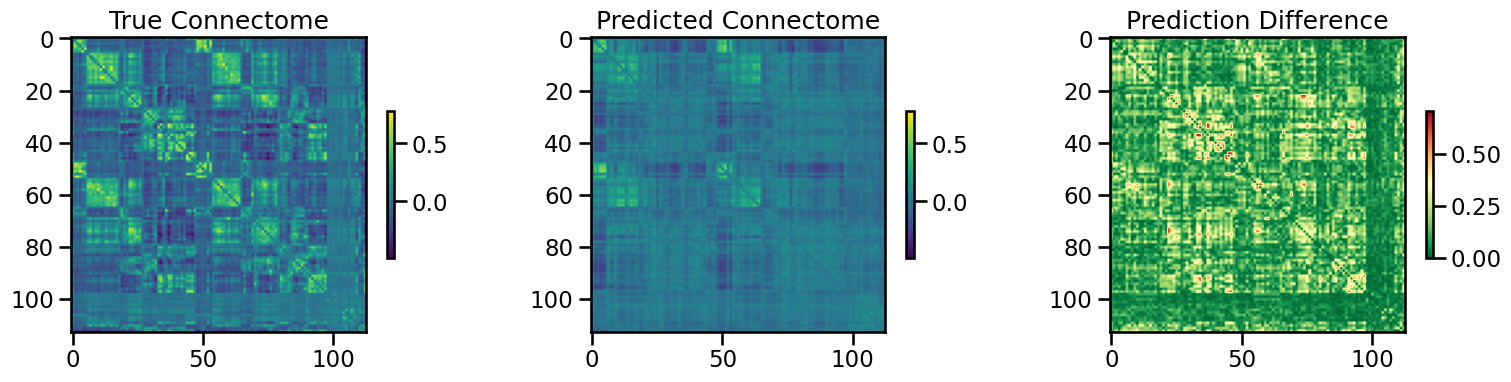

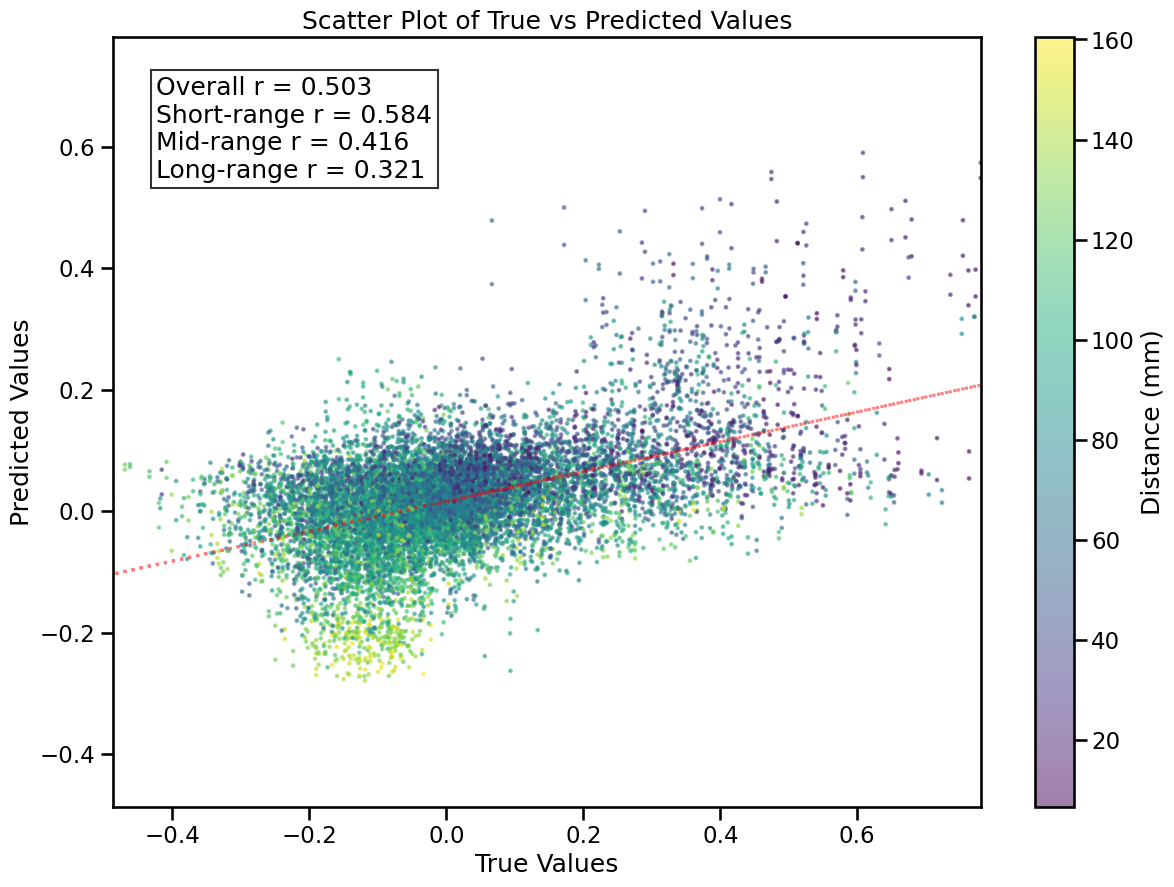

# of NaNs in bin_means_true: 0
bin_means_true: [ 0.59374931  0.34518385  0.2060241   0.126063    0.05330483  0.02544285
  0.02328442  0.0117186  -0.00361286 -0.00284734 -0.02001717 -0.02771454
 -0.04444014 -0.04974814 -0.0948243  -0.05777033 -0.03331377]
bin_centers: [  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
 145. 155. 165.]

Distance-based prediction metrics:
MSE: 0.0287
MAE: 0.1255
R2: 0.1276
Pearson r: 0.3675


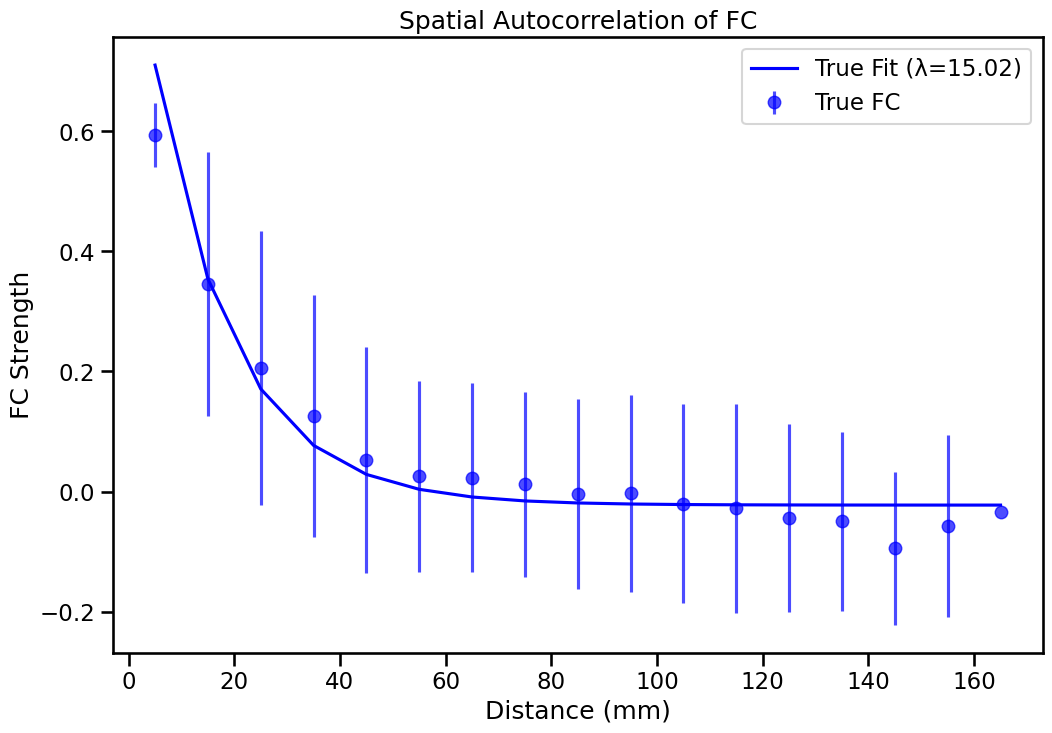


TRAIN METRICS: {'mse': 0.025012638, 'mae': 0.11576287, 'r2': 0.26258451376150005, 'pearson_corr': 0.5238927076353666, 'geodesic_distance': 38.055158038740515}
TEST METRICS: {'mse': 0.024543723, 'mae': 0.1179321, 'r2': 0.25269717378712775, 'pearson_corr': 0.5029788907712901, 'geodesic_distance': 20.615099225966883}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'input_dim': 54, 'binarize': False, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'epochs': 5}
CPU Usage: 4.0%
RAM Usage: 3.4%
Available RAM: 1.4T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |


43455

In [19]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='dynamic_mlp',
              feature_type=[{'transcriptome_PCA': None}],
              connectome_target='FC',
              binarize=False,
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              gene_list='0.2',
              impute_strategy='mirror_interpolate',
              sort_genes='expression',
              hemisphere='both',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()